# 01 — Intro to Colab + GeoPandas

Run the first cell to install dependencies. Then load and plot a tiny dataset.

In [4]:
# --- Course bootstrap: installs + imports + settings ---
# System deps for rtree
!apt-get -qq install -y libspatialindex-dev

# Python deps (pin versions for stability)
%pip -q install geopandas shapely pyproj==3.6.1 rtree==1.2.0 pysal==25.07 pyogrio==0.9.0 contextily==1.6.0 folium==0.17.0 ipywidgets==8.1.3

# Imports
import warnings; warnings.filterwarnings("ignore")
import pandas as pd, numpy as np, geopandas as gpd
from libpysal import weights
from esda import Moran
import contextily as cx
from pyogrio import read_dataframe

# Display settings
pd.set_option("display.max_rows", 8)
print("Environment ready.")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 12.5 MB/s eta 0:00:00
   ━━━━

In [8]:
!mkdir data

In [9]:
!wget -q -O data/neighborhoods.geojson https://raw.githubusercontent.com/sjsrey/585s25-test/main/data/data/neighborhoods.geojson


In [12]:
import libpysal

In [13]:
libpysal.examples.load_example('South')

In [14]:
libpysal.examples.get_path('south.shp')

'/root/.local/share/pysal/South/south/south.shp'

In [15]:
pth = libpysal.examples.get_path('south.shp')

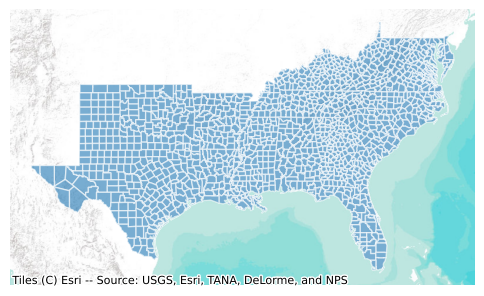

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Hancock,West Virginia,54,029,54029,54,29,54029,1,1.682864,...,2.557262,0.223645,0.295377,0.332251,0.363934,9.981297,7.8,9.785797,12.604552,"POLYGON ((-8975473.665 4923971.483, -8972577.5..."
1,Brooke,West Virginia,54,009,54009,54,9,54009,1,4.607233,...,0.748370,0.220407,0.318453,0.314165,0.350569,10.929337,8.0,10.214990,11.242293,"POLYGON ((-8964141.451 4889577.066, -8970970.6..."
2,Ohio,West Virginia,54,069,54069,54,69,54069,1,0.974132,...,3.310334,0.272398,0.358454,0.376963,0.390534,15.621643,12.9,14.716681,17.574021,"POLYGON ((-8964020.851 4869248.923, -8987761.3..."
3,Marshall,West Virginia,54,051,54051,54,51,54051,1,0.876248,...,0.546097,0.227647,0.319580,0.320953,0.377346,11.962834,8.8,8.803253,13.564159,"POLYGON ((-8963942.715 4825499.522, -8998230.6..."
4,New Castle,Delaware,10,003,10003,10,3,10003,1,4.228385,...,16.480294,0.256106,0.329678,0.365830,0.332703,12.035714,10.7,15.169480,16.380903,"POLYGON ((-8434978.096 4776683.486, -8437063.9..."


In [17]:
# Load demo data (GeoJSON in this repo)
import geopandas as gpd, matplotlib.pyplot as plt
gdf = gpd.read_file(pth)
gdf = gdf.to_crs(3857)  # web mercator

ax = gdf.plot(figsize=(6,6), alpha=0.6, edgecolor='white')
import contextily as cx
cx.add_basemap(ax, source=cx.providers.Esri.WorldTerrain)
ax.set_axis_off()
plt.show()

gdf.head()

## Save your work
Go to **File → Save a copy in Drive** so you can edit your own copy.